In [369]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [370]:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
response = requests.get(url,limit).json()

In [371]:
response_df = pd.DataFrame(response)

In [372]:
response_df_formatted = response_df.copy()
response_df_formatted["lat"]=response_df_formatted["lat"].astype(float)
response_df_formatted["lon"]=response_df_formatted["lon"].astype(float)
response_df_formatted=response_df_formatted.loc[(response_df_formatted["lon"] != 0) & (response_df_formatted["lat"] != 0)]

In [373]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [374]:
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
response_df_formatted.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020


In [375]:
clean = response_df_formatted.dropna(subset=["date_occ", "area_name", "lat", "lon"])
clean.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020


In [376]:
clean_2021 = clean.loc[(clean["date_occ"] >= "2020-03-01") & (clean["date_occ"] < "2021-03-01")]
clean_2122 = clean.loc[(clean["date_occ"] >= "2021-03-01") & (clean["date_occ"] < "2022-03-01")]
clean_2223 = clean.loc[(clean["date_occ"] >= "2022-03-01") & (clean["date_occ"] < "2023-03-01")]
clean_2324 = clean.loc[(clean["date_occ"] >= "2023-03-01") & (clean["date_occ"] < "2024-03-01")]
clean_2021["Year"] = "2020"
clean_2122["Year"] = "2021"
clean_2223["Year"] = "2022"
clean_2324["Year"] = "2023"

C:\Users\PC\AppData\Local\Temp\ipykernel_824\4140397869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021["Year"] = "2020"
C:\Users\PC\AppData\Local\Temp\ipykernel_824\4140397869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122["Year"] = "2021"
C:\Users\PC\AppData\Local\Temp\ipykernel_824\4140397869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [377]:
combodata = pd.concat([clean_2021, clean_2122, clean_2223, clean_2324], ignore_index=False, axis=0)

In [378]:
combodata.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020


In [379]:
response_df_formatted = combodata

In [380]:
response_df_formatted["Ethnicity"] = response_df_formatted["vict_descent"].replace({"A":"Other Asian","B": "Black","C":"Chinese","D":"Cambodian",
                                                                                    "F":"Filipino","G":"Guamanian","H":"Hispanic/Latin/Mexican",
                                                                                    "I": "American Indian/Alaskan Native","J":"Japanese",
                                                                                    "K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
                                                                                    "S":"Samoan","U":"Hawaiian","V":"Viatnamese","W":"White","X":"Unknown",
                                                                                    "Z":"Asian Indian"})

In [381]:
response_df_formatted['date_occ'] = pd.to_datetime(response_df_formatted['date_occ'])

In [382]:
validated_vict_desc_data = response_df_formatted[["Ethnicity","Year"]].loc[response_df_formatted["Ethnicity"]!="-"]
ethnicity_victim_count = validated_vict_desc_data["Ethnicity"].count()

In [383]:
validated_vict_desc_data.dropna(subset=["Ethnicity"],inplace=True)

In [384]:
ethnicity_year_2020 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2020"]
ethnicity_year_2021 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2021"]
ethnicity_year_2022 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2022"]
ethnicity_year_2023 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2023"]
ethnicity_year_2024 = validated_vict_desc_data.loc[validated_vict_desc_data["Year"] == "2024"]

In [385]:
ethnicity_breakdown_2020=ethnicity_year_2020.groupby(["Ethnicity"]).size()/ethnicity_year_2020["Ethnicity"].count()
ethnicity_breakdown_2021=ethnicity_year_2021.groupby(["Ethnicity"]).size()/ethnicity_year_2021["Ethnicity"].count()
ethnicity_breakdown_2022=ethnicity_year_2022.groupby(["Ethnicity"]).size()/ethnicity_year_2022["Ethnicity"].count()
ethnicity_breakdown_2023=ethnicity_year_2023.groupby(["Ethnicity"]).size()/ethnicity_year_2023["Ethnicity"].count()
ethnicity_breakdown_2024=ethnicity_year_2024.groupby(["Ethnicity"]).size()/ethnicity_year_2024["Ethnicity"].count()

In [386]:
ethnicity_breakdown_2021

Ethnicity
American Indian/Alaskan Native    0.001136
Asian Indian                      0.000767
Black                             0.165642
Cambodian                         0.000092
Chinese                           0.004578
Filipino                          0.005556
Guamanian                         0.000071
Hawaiian                          0.000256
Hispanic/Latin/Mexican            0.351769
Japanese                          0.001767
Korean                            0.007231
Laotian                           0.000098
Other                             0.091759
Other Asian                       0.024427
Pacific Islander                  0.000299
Samoan                            0.000071
Unknown                           0.099490
Viatnamese                        0.001267
White                             0.243728
dtype: float64

In [429]:
ethnicity_breakdown_change_2021 = (100*(ethnicity_breakdown_2021 - ethnicity_breakdown_2020)/ethnicity_breakdown_2020).rename("2021 % Change")
ethnicity_breakdown_change_2022 = (100*(ethnicity_breakdown_2022 - ethnicity_breakdown_2021)/ethnicity_breakdown_2021).rename("2022 % Change")
ethnicity_breakdown_change_2023 = (100*(ethnicity_breakdown_2023 - ethnicity_breakdown_2022)/ethnicity_breakdown_2022).rename("2023 % Change")


In [430]:
ethnicity_bd_df_21 = ethnicity_breakdown_change_2021.to_frame()

ethnicity_bd_df_22 = ethnicity_breakdown_change_2022.to_frame()

ethnicity_bd_df_23 = ethnicity_breakdown_change_2023.to_frame()


In [431]:
ethnicity_bd_df_21.reset_index(inplace = True)
ethnicity_bd_df_22.reset_index(inplace = True)
ethnicity_bd_df_23.reset_index(inplace = True)

In [432]:
combined_bd_df = ethnicity_bd_df_21.merge(ethnicity_bd_df_22,how="outer",on="Ethnicity")
combined_bd_df = combined_bd_df.merge(ethnicity_bd_df_23,how="outer",on="Ethnicity")
combined_bd_df.sort_values(by=['2021 % Change'],ascending=False,inplace=True)
combined_bd_df_head = combined_bd_df.head(7)

[]

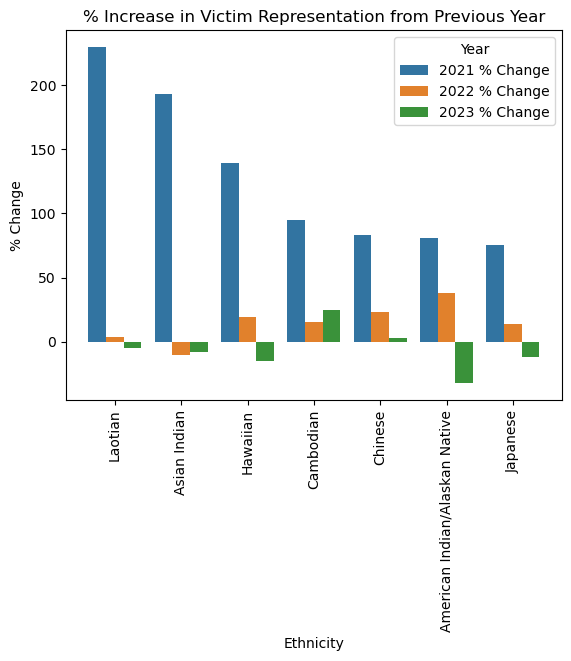

In [437]:
percent_change_plot = sns.barplot(data=combined_bd_df_head.melt(id_vars="Ethnicity",value_name="% Change",var_name="Year"),x="Ethnicity",y="% Change",hue="Year")
percent_change_plot.set_title("% Increase in Victim Representation from Previous Year")
plt.xticks(rotation=90)
percent_change_plot.plot()

In [392]:
ethnicity_bd_df_21.sort_values(by=['2021 % Change'],ascending=False,inplace=True)

In [393]:
ethnicity_bd_df_21 = ethnicity_bd_df_21.head(15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Laotian'),
  Text(1, 0, 'Asian Indian'),
  Text(2, 0, 'Hawaiian'),
  Text(3, 0, 'Cambodian'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'American Indian/Alaskan Native'),
  Text(6, 0, 'Japanese'),
  Text(7, 0, 'Samoan'),
  Text(8, 0, 'Filipino'),
  Text(9, 0, 'Viatnamese'),
  Text(10, 0, 'Korean'),
  Text(11, 0, 'Pacific Islander'),
  Text(12, 0, 'Other Asian'),
  Text(13, 0, 'Hispanic/Latin/Mexican'),
  Text(14, 0, 'Black')])

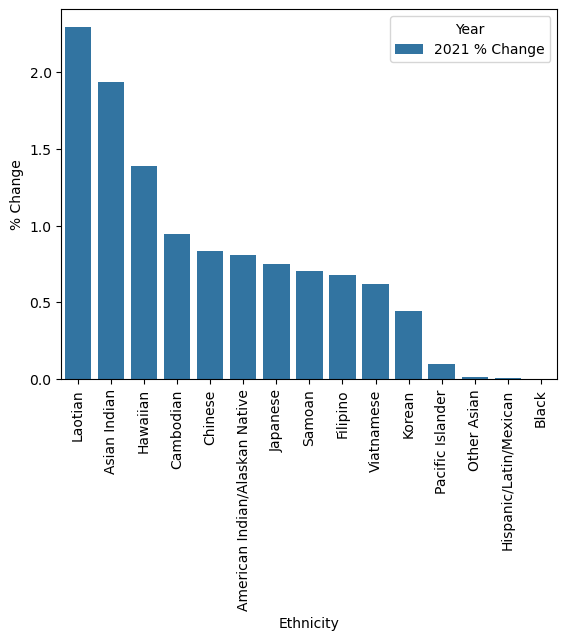

In [394]:
percent_change_plot = sns.barplot(data=ethnicity_bd_df_21.melt(id_vars="Ethnicity",value_name="% Change",var_name="Year"),
x="Ethnicity",y="% Change",hue="Year")
plt.xticks(rotation=90)

In [395]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4', 'Year', 'Ethnicity'],
      dtype='object')

In [427]:
#codes sourced from LAPD PDF on dataset site
mocode_formatted = response_df_formatted.copy().dropna(subset=['mocodes'])


In [428]:
mocode_formatted

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,Year,Ethnicity,Age Group
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,2020,Unknown,Young Adult
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,2020,Other,Young Adult
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,2020,Hispanic/Latin/Mexican,Young Adult
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,2020,Hispanic/Latin/Mexican,Adult
6,230110144,2023-04-04T00:00:00.000,2020-07-03,0900,01,Central,0182,2,354,THEFT OF IDENTITY,...,-118.2620,0930 0929,NaN,NaN,NaN,NaN,NaN,2020,Hispanic/Latin/Mexican,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN,2023,Other,Elderly
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN,2023,Hispanic/Latin/Mexican,Adult
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,-118.6214,0385,NaN,NaN,NaN,NaN,NaN,2023,Other,Adult
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN,2023,Other,Elderly


In [397]:
response_df_formatted["vict_age"]=response_df_formatted["vict_age"].astype("int")

In [398]:
bins = [0,18,30,45,65,120]
group_names = ["Minor","Young Adult","Adult","Senior","Elderly"]
response_df_formatted["Age Group"] = pd.cut(response_df_formatted["vict_age"],bins,labels=group_names,include_lowest=True)

In [399]:
validated_age_desc_data = response_df_formatted.loc[response_df_formatted["vict_age"]>=1]
validated_age_desc_data["vict_age"].value_counts()

vict_age
30     19768
35     19444
31     18929
29     18771
28     18573
       ...  
95        89
96        85
98        68
97        67
120        1
Name: count, Length: 99, dtype: int64

In [400]:
response_df_formatted["Year"].unique()

array(['2020', '2021', '2022', '2023'], dtype=object)

In [401]:
validated_age_desc_data["Age Group"].value_counts()

Age Group
Adult          227832
Young Adult    186073
Senior         165055
Elderly         44327
Minor           28105
Name: count, dtype: int64

In [402]:
age_group_2020 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2020"]
age_group_2021 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2021"]
age_group_2022 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2022"]
age_group_2023 = validated_age_desc_data["Age Group"].loc[response_df_formatted["Year"] == "2023"]
age_group_all = validated_age_desc_data["Age Group"].count()

In [403]:
age_breakdown_2020=(age_group_2020.value_counts()*100/age_group_2020.count()).rename("2020 Age Group %")
age_breakdown_2021=(age_group_2021.value_counts()*100/age_group_2021.count()).rename("2021 Age Group %")
age_breakdown_2022=(age_group_2022.value_counts()*100/age_group_2022.count()).rename("2022 Age Group %")
age_breakdown_2023=(age_group_2023.value_counts()*100/age_group_2023.count()).rename("2023 Age Group %")


In [404]:
age_breakdown_2020_df = age_breakdown_2020.to_frame()
age_breakdown_2020_df.reset_index(inplace = True)

age_breakdown_2021_df = age_breakdown_2021.to_frame()
age_breakdown_2021_df.reset_index(inplace = True)

age_breakdown_2022_df = age_breakdown_2022.to_frame()
age_breakdown_2022_df.reset_index(inplace = True)

age_breakdown_2023_df = age_breakdown_2023.to_frame()
age_breakdown_2023_df.reset_index(inplace = True)


In [405]:
age_breakdown_2020_df

,Age Group,2020 Age Group %
0,Adult,34.462457
1,Young Adult,28.534558
2,Senior,26.622488
3,Elderly,6.394792
4,Minor,3.985706


In [444]:
combined_age_df = age_breakdown_2020_df.merge(age_breakdown_2021_df,how="outer",on="Age Group")
combined_age_df = combined_age_df.merge(age_breakdown_2022_df,how="outer", on="Age Group")
combined_age_df = combined_age_df.merge(age_breakdown_2023_df,how="outer", on="Age Group")


In [445]:
combined_age_df

,Age Group,2020 Age Group %,2021 Age Group %,2022 Age Group %,2023 Age Group %
0,Adult,34.462457,34.727130,35.620774,34.969964
1,Young Adult,28.534558,28.754865,28.609910,28.356491
2,Senior,26.622488,25.610624,24.650261,24.682339
3,Elderly,6.394792,6.695050,6.712670,7.382596
4,Minor,3.985706,4.212331,4.406385,4.608611


In [448]:
combined_age_categorical_df = combined_age_df.rename(columns = {"2020 Age Group %":"Restrictions Begin",
                                                                "2021 Age Group %":"Vaccine Availability",
                                                                "2022 Age Group %":"Booster Availability",
                                                                "2023 Age Group %":"Restrictions End"})


In [449]:
combined_age_categorical_df

,Age Group,Restrictions Begin,Vaccine Availability,Booster Availability,Restrictions End
0,Adult,34.462457,34.727130,35.620774,34.969964
1,Young Adult,28.534558,28.754865,28.609910,28.356491
2,Senior,26.622488,25.610624,24.650261,24.682339
3,Elderly,6.394792,6.695050,6.712670,7.382596
4,Minor,3.985706,4.212331,4.406385,4.608611


In [467]:
response_df_year_only = response_df_formatted["Year"]
response_df_year_only.value_counts()

Year
2022    236963
2023    228420
2021    212633
2020    194853
Name: count, dtype: int64

In [459]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4', 'Year', 'Ethnicity', 'Age Group'],
      dtype='object')

c:\Users\PC\anaconda3\envs\inclassfeb2024\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\PC\anaconda3\envs\inclassfeb2024\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


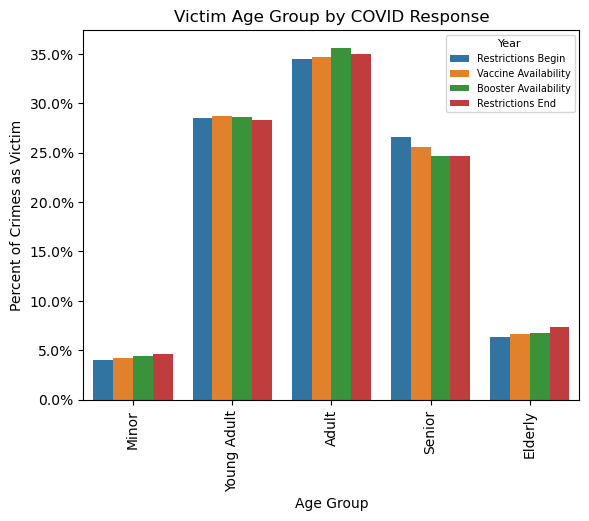

In [454]:
age_group_plot = sns.barplot(data=combined_age_categorical_df.melt(id_vars="Age Group",value_name="Percent of Crimes as Victim",var_name="COVID Response"),
x="Age Group",y="Percent of Crimes as Victim",hue="COVID Response")
plt.xticks(rotation=90)
plt.legend(title="Year", fontsize=7, title_fontsize=8)
age_group_plot.set_title("Victim Age Group by COVID Response")
age_group_plot.yaxis.set_major_formatter(mtick.PercentFormatter())

In [408]:
crime_by_vic_age = validated_age_desc_data[["Age Group","crm_cd_desc","Year"]]

In [409]:
crime_by_vic_minor = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Minor"]
crime_by_vic_young_adult = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Young Adult"]
crime_by_vic_adult = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Adult"]
crime_by_vic_senior = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Senior"]
crime_by_vic_elderly = crime_by_vic_age.loc[crime_by_vic_age["Age Group"] == "Elderly"]

In [410]:
##Cleaning assault data for minors - they divide children under 13

#creating a new dataframe for the chart. As is multiple types of assault are showing up in the graph - relevant as they are different types of assault
#but uninteresting presentation. Also removing "Crime Against Child" as it is vague when defining crime type against children
#Shortening Unlawful Sex for readability
crime_by_vic_minor_chart_view = crime_by_vic_minor.copy()
print(len(crime_by_vic_minor_chart_view["crm_cd_desc"].unique()))
crime_by_vic_minor_chart_view["crm_cd_desc"].replace({"CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT":"ASSAULT",
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT":"ASSAULT","BATTERY - SIMPLE ASSAULT":"ASSAULT",
"INTIMATE PARTNER - SIMPLE ASSAULT":"ASSAULT","SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ": "UNLAWFUL SEX"},inplace=True)
crime_by_vic_minor_chart_view = crime_by_vic_minor_chart_view.loc[
    crime_by_vic_minor_chart_view["crm_cd_desc"]!= "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)"]
print(len(crime_by_vic_minor_chart_view["crm_cd_desc"].unique()))
crime_by_vic_minor_chart_view["crm_cd_desc"].unique()
##Remove "CRM AGAINST CHILD", "CHILD ABUSE (PHYSICAL), "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT

103
99


array(['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'THEFT OF IDENTITY', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'BURGLARY FROM VEHICLE', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'ORAL COPULATION', 'UNLAWFUL SEX', 'RAPE, FORCIBLE', 'ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', 'BATTERY WITH SEXUAL CONTACT',
       'SEXUAL PENETRATION W/FOREIGN OBJECT', 'DISTURBING THE PEACE',
       'OTHER MISCELLANEOUS CRIME',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'CONTRIBUTING',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
       'UNAUTHORIZED COMPUTER ACCESS', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
       'CHILD NEGLECT (SEE 300 W.I.C.)', 'RAPE, ATTEMPTED', 'PEEPING TOM',
       'ROBBERY', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'THEFT FROM PERSON - ATTEMPT',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'ATTEMPTED ROBBERY', 'INDECENT EXPOSURE',
       'KIDNAPPING - GRAND ATTEMPT', 'CONTEMPT OF COURT',
     

In [411]:
minor_as_vic_crime_type = crime_by_vic_minor_chart_view["crm_cd_desc"].value_counts()
minor_as_vic_crime_type.rename("Crimes Against Minors")
minor_as_vic_crime_type.sort_values(ascending=False)
top_crimes_minor_as_vic = minor_as_vic_crime_type.head(5)

<Axes: xlabel='crm_cd_desc'>

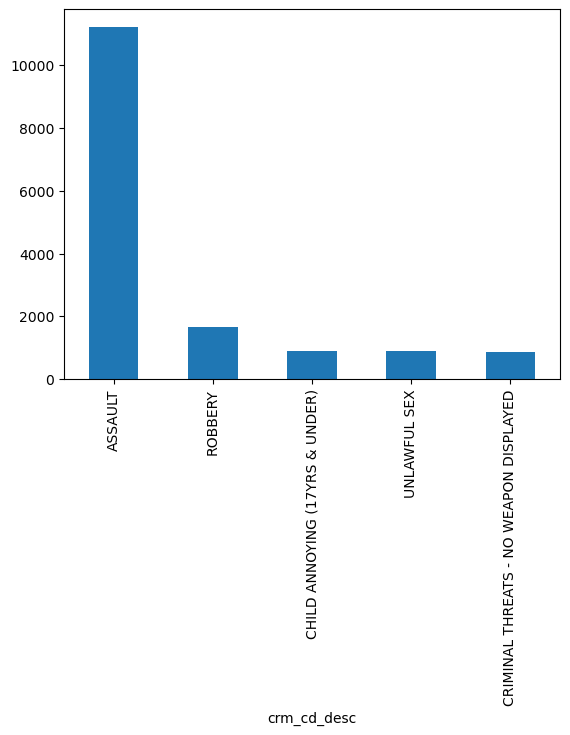

In [412]:
top_crimes_minor_as_vic.plot(kind='bar', stacked=True)

<Axes: ylabel='count'>

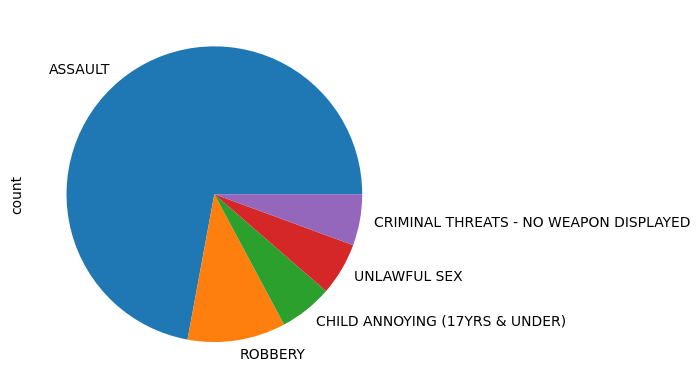

In [413]:
top_crimes_minor_as_vic.plot(kind='pie')

In [414]:
senior_as_vic_crime_type = crime_by_vic_senior["crm_cd_desc"].value_counts()
senior_as_vic_crime_type.rename("Crimes Against Seniors")
senior_as_vic_crime_type.sort_values(ascending=False)
top_crimes_senior_as_vic = senior_as_vic_crime_type.head(5)


<Axes: xlabel='crm_cd_desc'>

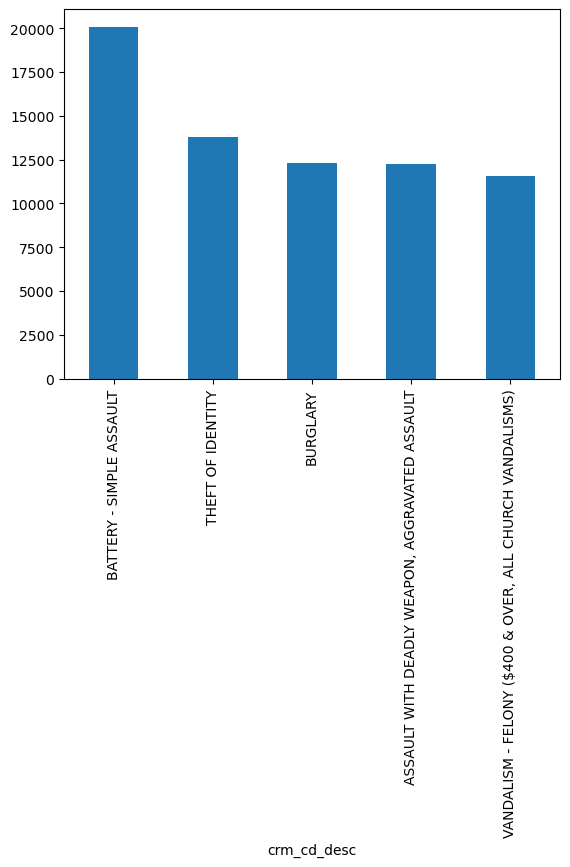

In [415]:
top_crimes_senior_as_vic.plot(kind='bar', stacked=True)

<Axes: ylabel='count'>

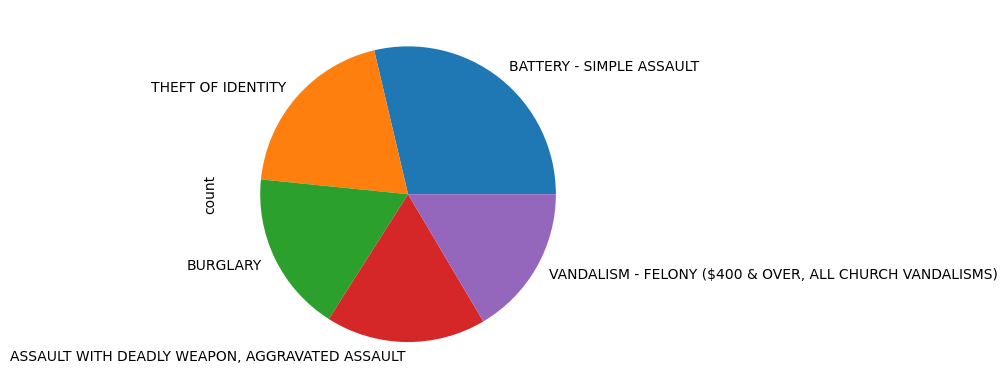

In [416]:
top_crimes_senior_as_vic.plot(kind='pie')

In [417]:
elderly_as_vic_crime_type = crime_by_vic_elderly["crm_cd_desc"].value_counts()
elderly_as_vic_crime_type.rename("Crimes Against Elderly")
elderly_as_vic_crime_type.sort_values(ascending=False)
top_crimes_elderly_as_vic = elderly_as_vic_crime_type.head(5)

<Axes: xlabel='crm_cd_desc'>

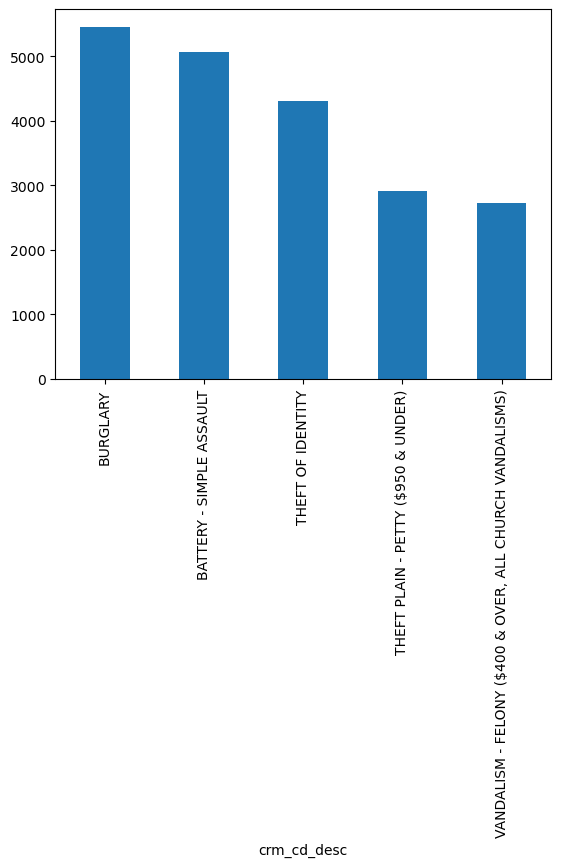

In [418]:
top_crimes_elderly_as_vic.plot(kind='bar', stacked=True)

<Axes: ylabel='count'>

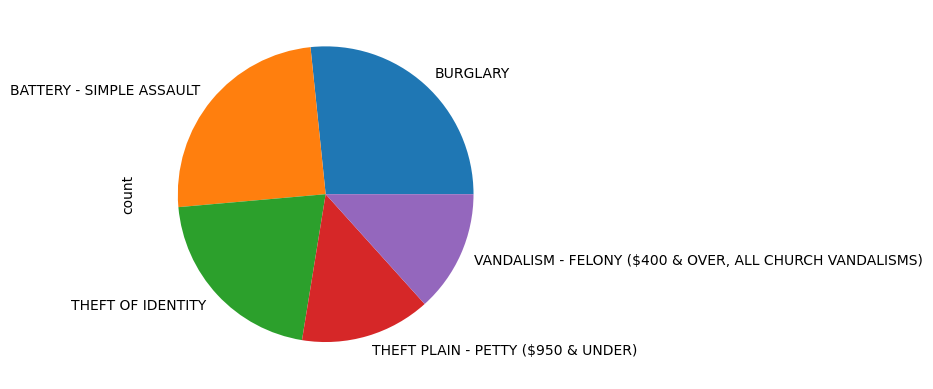

In [419]:
top_crimes_elderly_as_vic.plot(kind='pie')

In [420]:
domestic_crimes = validated_age_desc_data[["Age Group","Year","premis_desc"]].loc[(validated_age_desc_data["premis_desc"] == 'CONDOMINIUM/TOWNHOUSE') | 
(validated_age_desc_data["premis_desc"] == 'GROUP HOME')| 
(validated_age_desc_data["premis_desc"] == "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME")
|(validated_age_desc_data["premis_desc"] == 'FOSTER HOME BOYS OR GIRLS*') | 
(validated_age_desc_data["premis_desc"] == 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)')
|(validated_age_desc_data["premis_desc"] == 'SINGLE FAMILY DWELLING')]
domestic_minor_crimes = domestic_crimes.loc[domestic_crimes["Age Group"] == "Minor"]
domestic_minor_crimes.head()
domestic_minor_crimes.rename(columns = {"premis_desc":"Location Description"},inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_824\2055248150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_minor_crimes.rename(columns = {"premis_desc":"Location Description"},inplace=True)


In [421]:
dmc_yearly = domestic_minor_crimes["Year"].value_counts()
dmc_yearly

#Plot crm_cd_desc CHILD ABUSE & CHILD 

Year
2022    3249
2020    3205
2021    2942
2023    2864
Name: count, dtype: int64

In [422]:
response_df_formatted["Year"].unique()

array(['2020', '2021', '2022', '2023'], dtype=object)

<Axes: xlabel='Year'>

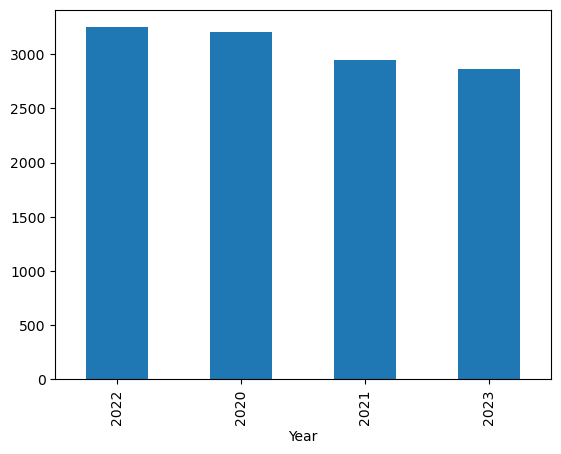

In [423]:
dmc_yearly.plot(kind="bar")

In [424]:
response_df_formatted["crm_cd_desc"].unique()

array(['VEHICLE - STOLEN', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'BURGLARY FROM VEHICLE',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BURGLARY',
       'CONTEMPT OF COURT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT PLAIN - ATTEMPT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'OTHER MISCELLANEOUS CRIME', 'ROBBERY', 'BUNCO, GRAND THEFT',
       'BATTERY WITH SEXUAL CONTACT',
       'INTIMATE PARTNER - 

In [425]:
child_crime = validated_age_desc_data.loc[(validated_age_desc_data["crm_cd_desc"] == 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT') | 
(validated_age_desc_data["crm_cd_desc"] == 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT') | (validated_age_desc_data["crm_cd_desc"] == 
'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT')
| (validated_age_desc_data["crm_cd_desc"] == 'LEWD/LASCIVIOUS ACTS WITH CHILD') | (validated_age_desc_data["crm_cd_desc"] == 'CHILD NEGLECT (SEE 300 W.I.C.)')]

child_crime = child_crime["Year"].value_counts()

<Axes: xlabel='Year'>

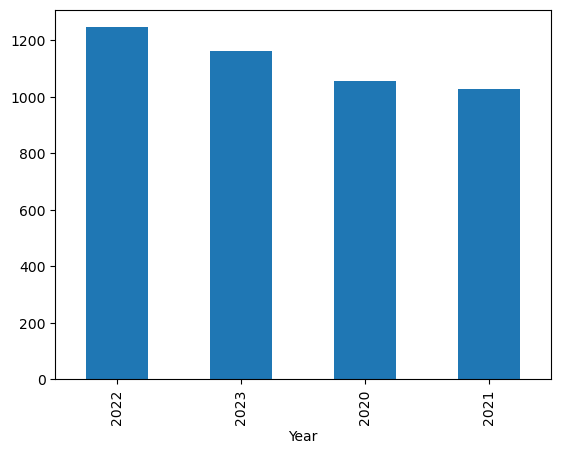

In [426]:
child_crime.plot(kind="bar")